In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from langdetect import detect

# Load data
file_path = '../Dataset_Original/VFND/vn_news_223_tdlfr.csv'
data = pd.read_csv(file_path)

In [9]:
data.head()

,text,domain,label
0,Thủ tướng Abe cúi đầu xin lỗi vì hành động phi...,binhluan.biz,1
1,Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần ph...,www.ipick.vn,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc...,tintucqpvn.net,1
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\n...,tintucqpvn.net,1
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt""...",www.gioitreviet.net,1


In [10]:
print(data['label'].value_counts())

label
0    123
1    100
Name: count, dtype: int64


In [11]:
print(data['domain'].value_counts())

domain
vnexpress.net              73
tinvn.info                 68
dantri.com.vn              14
thethao.tuoitre.vn         10
news.zing.vn                6
thoibao.today               6
tuoitre.vn                  5
thanhnien.vn                5
tintucqpvn.net              5
phapluat.news               3
kinhdoanh.vnexpress.net     3
thegioitre.vn               2
giadinhtiepthi.com          2
giaitri.vnexpress.net       2
thoibao.de                  2
www.ipick.vn                2
doisong.vnexpress.net       2
dulich.vnexpress.net        1
sohoa.vnexpress.net         1
binhluan.biz                1
https://news.zing.vn        1
www.vietgiaitri.com/        1
sorry.vn                    1
laodong.vn                  1
haiduong.tintuc.vn          1
baoangiang.com.vn           1
autoxe.net                  1
suckhoe.vnexpress.net       1
www.gioitreviet.net         1
baonuocmy.com               1
Name: count, dtype: int64


# Missing & duplicate values

In [12]:
data.isnull().sum()

text      0
domain    0
label     0
dtype: int64

In [13]:
# Numeber of unique values in each column
num_unique = data.nunique()

print(num_unique)


text      222
domain     30
label       2
dtype: int64


In [16]:
# Find duplicate texts and their corresponding domains
duplicate_texts = data[data.duplicated('text', keep=False)]
print(duplicate_texts)

Empty DataFrame
Columns: [text, domain, label]
Index: []


In [15]:
data = data.drop_duplicates(subset='text', keep=False)
print(data)

                                                  text               domain  \
0    Thủ tướng Abe cúi đầu xin lỗi vì hành động phi...         binhluan.biz   
1    Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần ph...         www.ipick.vn   
2    Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc...       tintucqpvn.net   
3    Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\n...       tintucqpvn.net   
4    Đại học Hutech sẽ áp dụng cải cách "Tiếq Việt"...  www.gioitreviet.net   
..                                                 ...                  ...   
218  “Siêu máy bay” A350 sẽ chở CĐV Việt Nam đi Mal...        dantri.com.vn   
219  Thưởng 20.000 USD cho đội tuyển cờ vua Việt Na...        dantri.com.vn   
220  Trường Sơn giành HCV tại giải cờ vua đồng đội ...        dantri.com.vn   
221  Chuyện về chàng sinh viên Luật - Kiện tướng Lê...        dantri.com.vn   
222  Tiền đạo Malaysia: “Tôi đã có cách vượt qua hà...        dantri.com.vn   

     label  
0        1  
1        1  
2        1  

# Distribution of domain

In [110]:
data['domain'],_ = pd.factorize(data['domain'])
correlation = data [['domain','label']].corr()
print(correlation)

          domain     label
domain  1.000000 -0.761575
label  -0.761575  1.000000


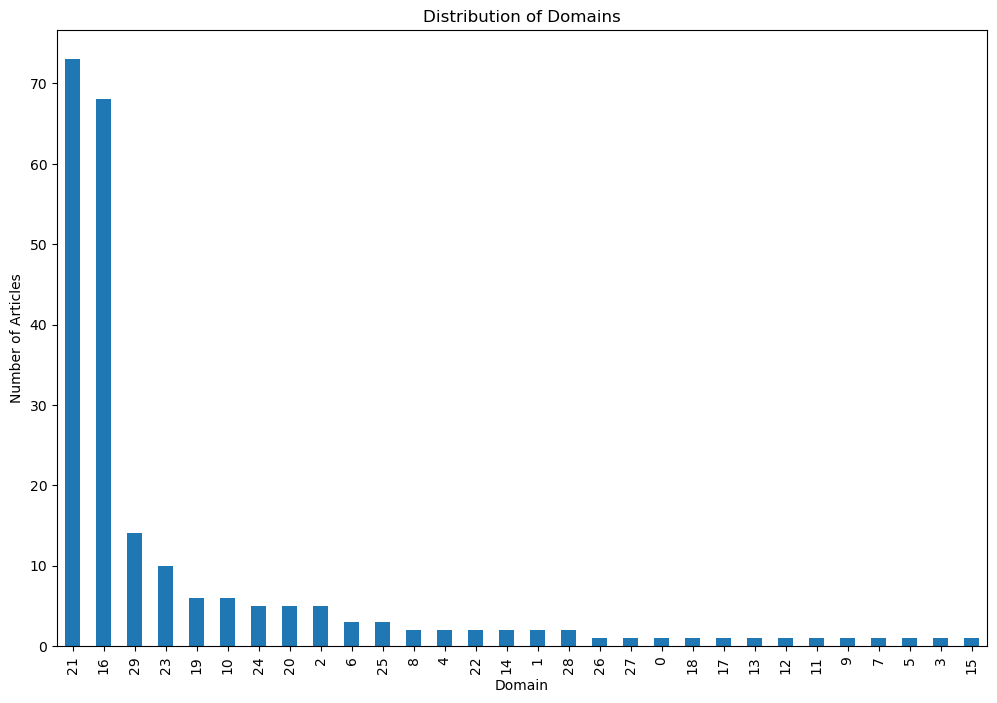

In [103]:
# Re-import matplotlib for plotting
domain_counts = data['domain'].value_counts()
plt.figure(figsize=(12, 8))
ax = domain_counts.plot(kind='bar')
plt.title('Distribution of Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')

# Rotate x-ticks and set labels
ax.set_xticklabels(domain_counts.index, rotation=90, ha='center')
plt.show()

In [115]:
data = pd.read_csv(file_path)
data['domain_length'] = data['domain'].apply(len)
print(data['domain_length'].describe())


count    223.000000
mean      12.672646
std        2.920187
min        8.000000
25%       10.000000
50%       13.000000
75%       13.000000
max       23.000000
Name: domain_length, dtype: float64


In [116]:
data['domain_length'],_ = pd.factorize(data['domain_length'])
correlation = data [['domain_length','label']].corr()
print(correlation)

               domain_length     label
domain_length       1.000000  0.221686
label               0.221686  1.000000


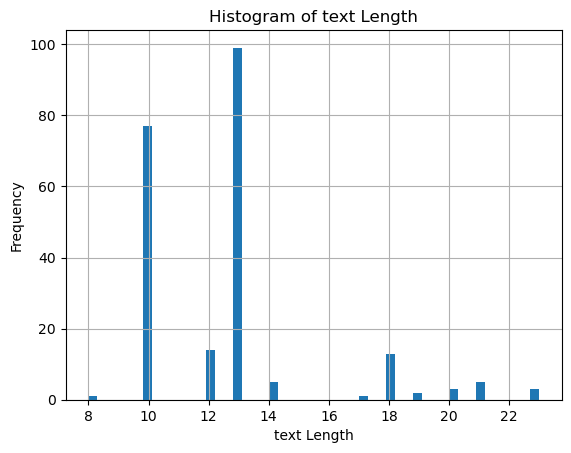

# Distribution of title length

In [10]:
# Calculate the length of each 'text'
data['text_length'] = data['text'].apply(len)
print(data['text_length'].describe())


count      223.000000
mean      2539.771300
std       1780.532008
min        309.000000
25%       1286.000000
50%       2009.000000
75%       3300.500000
max      10019.000000
Name: text_length, dtype: float64


In [15]:
print(data[data['label'] == 0]['text_length'].describe())
print(data[data['label'] == 1]['text_length'].describe())

count     123.000000
mean     2398.170732
std      1551.610452
min       309.000000
25%      1271.000000
50%      2104.000000
75%      2953.000000
max      6970.000000
Name: text_length, dtype: float64
count      100.000000
mean      2713.940000
std       2021.578585
min        755.000000
25%       1323.750000
50%       1860.500000
75%       3424.500000
max      10019.000000
Name: text_length, dtype: float64


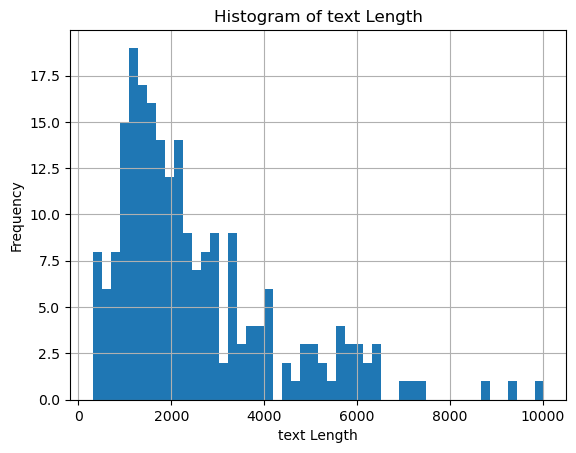

In [16]:
data['text_length'].hist(bins=50)
plt.title('Histogram of text Length')
plt.xlabel('text Length')
plt.ylabel('Frequency')
plt.show()

# Below 1000 characters

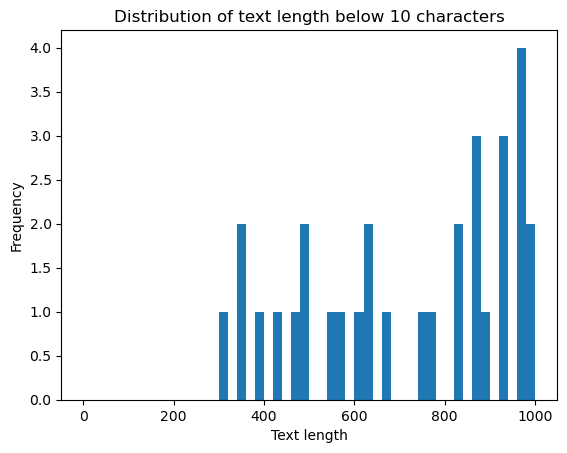

In [23]:
plt.hist(data['text_length'], bins=50, range=[1,1000 ])
plt.title('Distribution of text length below 10 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [25]:
print(data[data['text_length']<1000]['text'])

1      Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần ph...
5      Cười vỡ bụng khi tiếng CẢI CÁCH "vuông tròn" x...
31     Đứng bán nem chua rán, gái xinh khiến dân mạng...
32     Đi cả đêm mới về, bà mẹ tá hoả thấy mặt con bị...
38     Cảm giác như trục quay trái đất sắp gãy khi xe...
50     Tưởng ổ trứng gà mang về ấp thành con, thanh n...
57     Dụ em gái cosplay mới quen gửi ảnh trong bồn t...
76     Cứ tưởng đào được trứng khủng long, người đàn ...
81     Nếu thấy thứ này thò lên ngoài vườn nhà, đừng ...
86     Thích dạng háng check-in cho thoáng, thiếu nữ ...
87     Nhận xăm “chỗ kín” cho thiếu nữ, tái mặt vì th...
90     Hẹn hò người thương nơi sân trường, nam sinh k...
108    Thanh Bùi ôm vợ khóc trên sân khấu\n"Nếu như k...
115    Hơn 55 tỷ đồng nâng cấp 8,5 km đại lộ Võ Văn K...
117    Đường Sài Gòn kẹt từ sáng đến trưa\nĐường Quốc...
123    An Giang cấm sử dụng âm thanh dụ chim yến tron...
138    Khải Hoàn Môn tan hoang sau cuộc bạo loạn lớn ...
139    Hà Nội, Sài Gòn cờ rợp đ

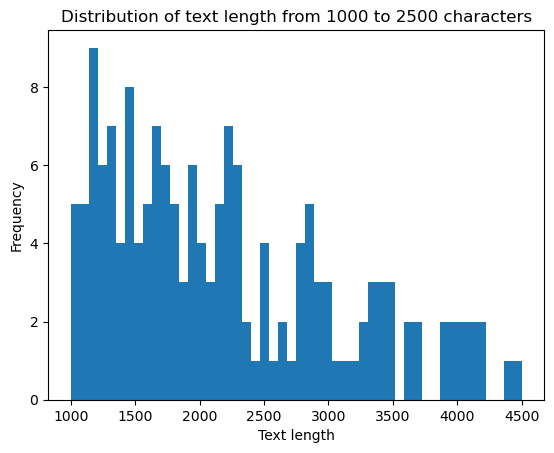

In [31]:
plt.hist(data['text_length'], bins=50, range=[1000, 4500])
plt.title('Distribution of text length from 1000 to 2500 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

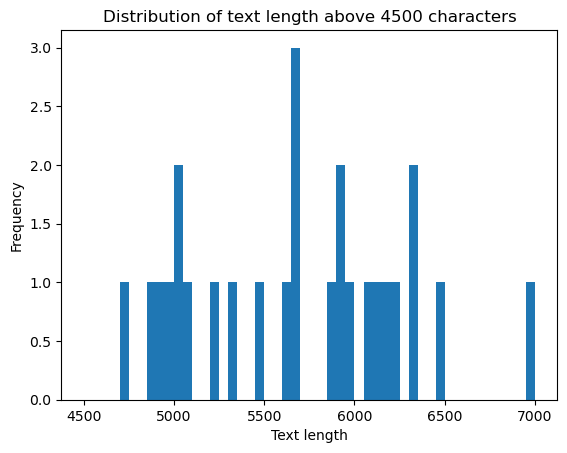

In [34]:
plt.hist(data['text_length'], bins=50, range=[4500, 7000])
plt.title('Distribution of text length above 4500 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [35]:
print(data[data['text_length']>4500]['text'])

4      Đại học Hutech sẽ áp dụng cải cách "Tiếq Việt"...
7      Hại não với Vọng Cổ mang tên Vuông Tròn Tam Gi...
8      Kinh hoàng bé gái bị chó nhà tấn công, cắn vào...
10     KHẨN CẤP: Hàng loạt trẻ em nhập viện vì ngộ độ...
23     Bi kịch ngoại tình với bố chồng\n\n\nVậy là sa...
24     Đức từ chối cấp Visa cho đoàn công tác nhà nướ...
26     Sự thật kinh hoàng về nước Mỹ qua lời kể của m...
37     Hàng ngàn người Hà Nội đứng hình khi chứng kiế...
39     Người đàn ông bị “ma dắt đi chơi” cho tới chết...
41     Những dấu hiệu nhận biết nhà bạn đang có ma và...
48     Sốc với những loại “bùa ngải” có thật dấu hiệu...
59     Vợ chết 3 ngày về báo mộng, chồng dỡ trần nhà ...
60     Đêm nào mẹ cũng báo mộng cho con trai và cái k...
61     Cưới vợ cho con trai, bố mẹ đặt 200 mâm cỗ như...
62     Chấp nhận đổ vỏ cho con nhỏ bạn thân và cái kế...
74     Những dấu hiệu nhận biết nhà bạn đang có ma và...
98     Chữa hết bệnh câm cho vợ, người chồng cay đắng...
103    Go-Jek và Grab giành giậ

### Text_length and label correlation

In [36]:
correlation = data[['text_length', 'label']].corr()
print(correlation)

             text_length     label
text_length     1.000000  0.088398
label           0.088398  1.000000


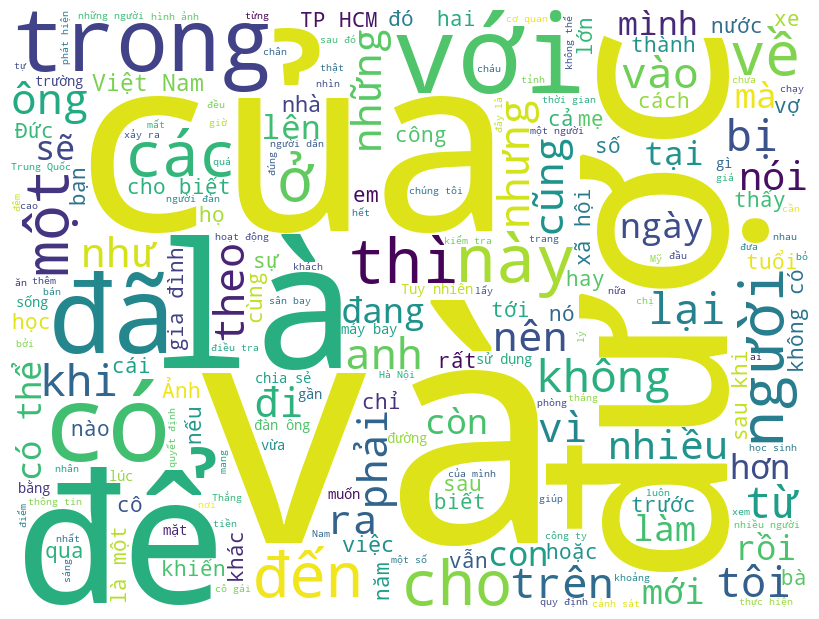

In [14]:
# Plot word cloud function
def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=600,
                          background_color='white',
                          stopwords=None,
                          min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Generate and plot word cloud for all texts_texts = ' '.join(data['text'].astype(str))



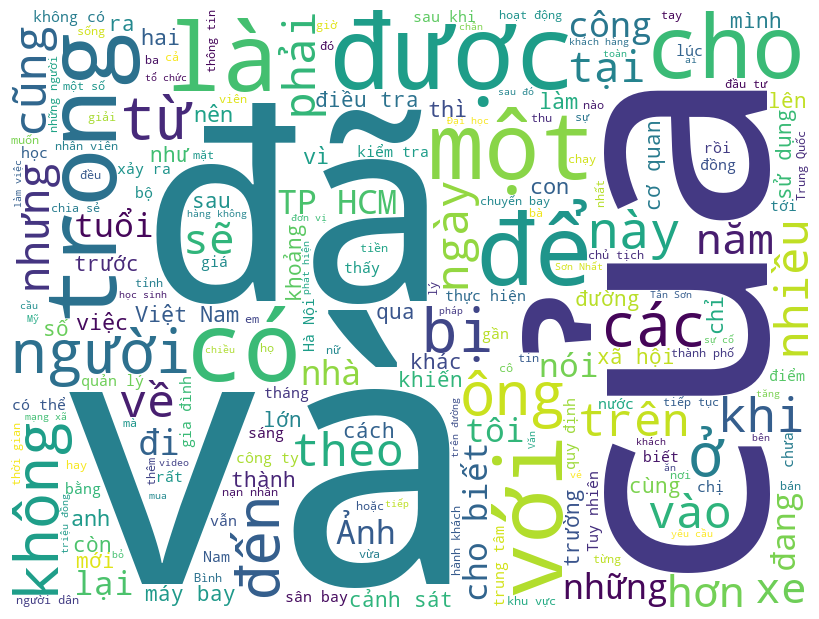

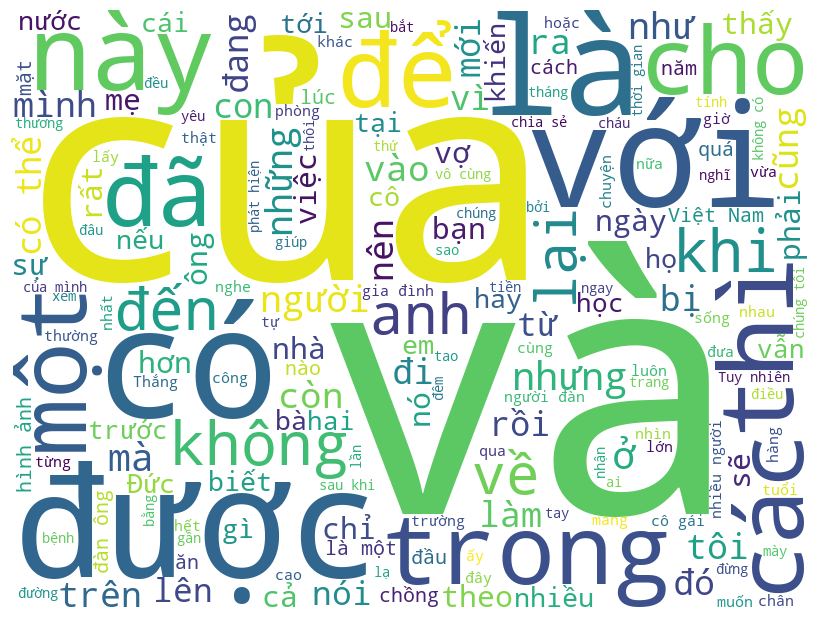

In [122]:
true_text = ' '.join(data[data['label'] == 0]['text'].astype(str))
fake_text = ' '.join(data[data['label'] == 1]['text'].astype(str))
plot_wordcloud(true_text)
plot_wordcloud(fake_text)

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data['text_length'] = data['text'].apply(len)
data['word_count'] = data['text'].apply(lambda x: len(x.split()))